In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Reading provided CSV file using panda library

In [2]:
df = pd.read_csv('loan.csv', low_memory=False)

Lets have look on CSV data, columns and shape

In [3]:
df.shape

(39717, 111)

In [389]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [390]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Understanding of these 44 columns to proceed ahead
- id : unique loan id for each row and sort of primary key
- member_id : unique_id for borrower
- loan_amnt : final loan (prinipal) amount of that loan
- funded_amnt : total ammount including prinicipal + interest + charges
- funded_amnt_inv : total amount funded by investor as part of principal
- term : tenure of emi payment of loan - 2 possible values - 36 months or 60 months
- int_rate : interest rate on which loan is given
- installment : monthly emi of the borrower
- grade : risk grade for loan - A is least risky, G is highest risky
- sub_grade : risk subgrade for loan - A1 is least and G5 is highest
- emp_title : job title of the borrower
- emp_length : duration of employee working in that emp_title, max is 10+ in possible values.
- home_ownership : home ownership status of borrower, possible values are RENT,MORTGAGE, OWN, OTHER
- annual_inc : annual income of the borrower
- verification_status : annual income is verified or not, possible values are verified, not verified, source verified
- issue_d : month in which loan was issued
- loan_status : current status of loan, possible values - Fully paid, Current, Charged Off
- url : url of lending club site with this loan details
- purpose : purpose of the borrower for taking loan, already categorize in 14 category
- title : description provided by the borrower for applying loan
- zip_code : 3 digits of pincode which will represent area, region, sub-region. these values have xx in end which can be removed.
- addr_state : state of address provided by borrower
- dti : debt to income ratio of borrower
- delinq_2yrs : occurence of 30+ delayed payment by borrower in last 2 years
- earliest_cr_line : month in which last loan was taken by borrower 
- inq_last_6mths : inquery of credit in last 6 months by any authorized lender for that borrower
- open_acc : number of active loans taken by borrower
- pub_rec : number of nagative records in past for borrower
- revol_bal : total outstanding credit balance of the borrower
- revol_util : credit utilization ratio - total outstanding credit/ total credit limit
- total_acc : total loan accounts of the borrower including closed in history
- out_prncp : remaining prinicpal amount of the borrower to be paid back
- out_prncp_inv : remaining pricipal amount of borrower to be paid that was funded by investor
- total_pymnt : total payment done by borrower till date for entire fund
- total_pymnt_inv : total payment done by borrower till date for fund funded by investor
- total_rec_prncp : total prinipal amount received as part of payment till date
- total_rec_int : total interst amount recevied
- total_rec_late_fee : total late fee recevied
- recoveries : total recovery from borrower
- collection_recovery_fee : collection fee involved in doing recovery by lendor
- last_pymnt_d : last month when payment was recevied
- last_pymnt_amnt : last total payment amount recevied
- last_credit_pull_d : last month on which credit score is checked by lendor
- pub_rec_bankruptcies : number of public records available for bankcrupt case for the borrower

### Data issues identified:
#### Missing Values :
- There is no row with all null values
- There are columns with null values
- There are columns which very few non null values and signifiant null values
- There are columns which single value across all rows
#### Standard Values issues :

Lets check if there are rows with all values null. 

In [391]:
completely_null_rows = df[df.isnull().all(axis=1)]
completely_null_rows

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


Now check columns with all values null and drop them from data set as it wont impact data analysis

In [392]:
columns_with_null = df.columns[df.isnull().all()]
print(columns_with_null)

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [393]:
df.dropna(axis=1, how='all', inplace=True)


Check the shape of data set again

In [394]:
df.shape

(39717, 57)

In [395]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [396]:
columns_with_null = df.columns[df.isnull().any()]
print(columns_with_null)

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [397]:
columns_with_null = df.isnull().sum()
columns_with_null[columns_with_null > 0]

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

Lets drop columns where null values are quite high in number

In [398]:
df.dropna(axis = 1, thresh = 30000, inplace=True)

In [399]:
columns_with_null = df.isnull().sum()
columns_with_null[columns_with_null > 0]

emp_title                     2459
emp_length                    1075
title                           11
revol_util                      50
last_pymnt_d                    71
last_credit_pull_d               2
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
pub_rec_bankruptcies           697
tax_liens                       39
dtype: int64

In [400]:
df.shape

(39717, 53)

In [401]:
columns_with_null = df.isnull().sum()
columns_with_null[columns_with_null > 0]

emp_title                     2459
emp_length                    1075
title                           11
revol_util                      50
last_pymnt_d                    71
last_credit_pull_d               2
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
pub_rec_bankruptcies           697
tax_liens                       39
dtype: int64

Lets check rows which signifant null values and drop

In [402]:
null_counts_rowwise = df.isnull().sum(axis=1)
null_counts_rowwise[null_counts_rowwise > 4]

39659    5
39660    5
39700    5
39704    5
39706    5
39714    5
39715    5
dtype: int64

In [403]:
# List of values to check
values_to_check = ["NA", "XX", "999", "N/A", "n/a", "NaN", "NULL", "null", "", "None", "Missing", "Unknown"]

# Check if values are present in any column
values_present_in_columns = df.isin(values_to_check).any()

# Display columns where values are present
columns_with_values = values_present_in_columns[values_present_in_columns].index.tolist()
print("Columns with values:", columns_with_values)

Columns with values: ['title']


In [404]:
df[df.title == 'Unknown'].shape

(1, 53)

In [405]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [406]:
df['delinq_amnt'].head(25)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
Name: delinq_amnt, dtype: int64

In [407]:
# Assuming df is your DataFrame
columns_to_drop = ['collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt']

# Use the drop method to remove the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [408]:
df.shape

(39717, 47)

In [409]:
columns_with_null = df.isnull().sum()
columns_with_null[columns_with_null > 0]

emp_title               2459
emp_length              1075
title                     11
revol_util                50
last_pymnt_d              71
last_credit_pull_d         2
pub_rec_bankruptcies     697
tax_liens                 39
dtype: int64

In [410]:
df['emp_title'].describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

In [411]:
df.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [412]:
# Assuming df is your DataFrame
columns_to_drop = ['pymnt_plan', 'initial_list_status', 'tax_liens']

# Use the drop method to remove the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [413]:
df.shape

(39717, 44)

In [414]:
columns_with_null = df.isnull().sum()
columns_with_null[columns_with_null > 0]

emp_title               2459
emp_length              1075
title                     11
revol_util                50
last_pymnt_d              71
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

In [415]:
#df.dropna(subset=['title','revol_util','last_pymnt_d','last_credit_pull_d','pub_rec_bankruptcies'], inplace=True)
#df.dropna(subset=['emp_length'], inplace=True)


In [416]:
columns_with_null = df.isnull().sum()
columns_with_null[columns_with_null > 0]

emp_title               2459
emp_length              1075
title                     11
revol_util                50
last_pymnt_d              71
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

In [418]:
columns_with_null = df.isnull().sum()
columns_with_null[columns_with_null > 0]

emp_title               2459
emp_length              1075
title                     11
revol_util                50
last_pymnt_d              71
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

In [419]:
df['emp_title'].fillna('Unknown', inplace=True)


In [420]:
df.shape

(39717, 44)

In [421]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

# Understanding of these 44 columns to proceed ahead
- id : unique loan id for each row and sort of primary key
- member_id : unique_id for borrower

- loan_amt : final loan (prinipal) amount of that loan
- funded_amnt : total ammount including prinicipal + interest + charges
- term : tenure of emi payment of loan - 2 possible values - 36 months or 60 months
- int_rate : interest rate on which loan is given
- installment : monthly emi of the borrower
- grade : risk grade for loan - A is least risky, G is highest risky
- sub_grade : risk subgrade for loan - A1 is least and G5 is highest
- emp_title : job title of the borrower
- emp_length : duration of employee working in that emp_title, max is 10+ in possible values.
- home_ownership : home ownership status of borrower, possible values are RENT,MORTGAGE, OWN, OTHER
- annual_inc : annual income of the borrower
- verification_status : annual income is verified or not, possible values are verified, not verified, source verified
- issue_d : month in which loan was issued
- loan_status : current status of loan, possible values - Fully paid, Current, Charged Off
- purpose : purpose of the borrower for taking loan, already categorize in 12 category
- title : description provided by the borrower for applying loan
- zip_code : 3 digits of pincode which will represent area, region, sub-region. these values have xx in end which can be removed.
- addr_state : state of address provided by borrower
- dti : debt to income ratio of borrower
- delinq_2yrs : occurence of 30+ delayed payment by borrower in last 2 years
- earliest_cr_line : month in which last loan was taken by borrower 
- inq_last_6mths : inquery of credit in last 6 months by any authorized lender for that borrower
- open_acc : number of active loans taken by borrower
- pub_rec : number of nagative records in past for borrower
- revol_bal : total outstanding credit balance of the borrower
- revol_util : credit utilization ratio - total outstanding credit/ total credit limit
- total_acc : total loan accounts of the borrower including closed in history
- out_prncp : remaining prinicpal amount of the borrower to be paid back
- total_pymnt : total payment done by borrower till date for entire fund
- total_rec_prncp : total prinipal amount received as part of payment till date
- total_rec_int : total interst amount recevied
- total_rec_late_fee : total late fee recevied
- recoveries : total recovery from borrower
- collection_recovery_fee : collection fee involved in doing recovery by lendor
- last_pymnt_d : last month when payment was recevied
- last_pymnt_amnt : last total payment amount recevied
- last_credit_pull_d : last month on which credit score is checked by lendor
- pub_rec_bankruptcies : number of public records available for bankcrupt case for the borrower

Lets see on standarize the values, we first look into numeric columns and then in text columns

df.shape

In [422]:
df.shape

(39717, 44)

In [423]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [424]:
import pandas as pd

# Assuming df is your DataFrame

# Get the float columns
float_columns = df.select_dtypes(include=['float']).columns

# Define a function to identify outliers using the IQR method
def identify_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

# Identify outliers for all float columns
all_outliers = pd.DataFrame()
for column in float_columns:
    outliers = identify_outliers(column)
    all_outliers[column] = outliers
    print(column, outliers.sum(), df[column].mean(), df[column].median())

# Display or use the information about outliers
#print(all_outliers.sum())


funded_amnt_inv 1000 10397.448867750922 8975.0
installment 1245 324.5619220988493 280.22
annual_inc 1843 68968.92637711811 59000.0
dti 0 13.315129541506153 13.4
out_prncp 1140 51.22788730266637 0.0
out_prncp_inv 1140 50.98976810937382 0.0
total_pymnt 1334 12153.596543630887 9899.640319
total_pymnt_inv 1441 11567.149118009922 9287.15
total_rec_prncp 972 9793.348813102702 8000.0
total_rec_int 3157 2263.6631721932677 1348.91
total_rec_late_fee 2046 1.3630152124181836 0.0
recoveries 4218 95.22162387467331 0.0
collection_recovery_fee 3782 12.406111894151396 0.0
last_pymnt_amnt 4286 2678.826162348616 546.14
pub_rec_bankruptcies 1681 0.04325986673500769 0.0


In [425]:
# lets remove percentage icon from this column
df.int_rate = df.int_rate.str.rstrip('%')

In [426]:
df['int_rate'] = pd.to_numeric(df['int_rate'], errors='coerce')


In [427]:
df.revol_util = df.revol_util.str.rstrip('%')
df['revol_util'] = pd.to_numeric(df['revol_util'], errors='coerce')

(30149, 44)

<Axes: >

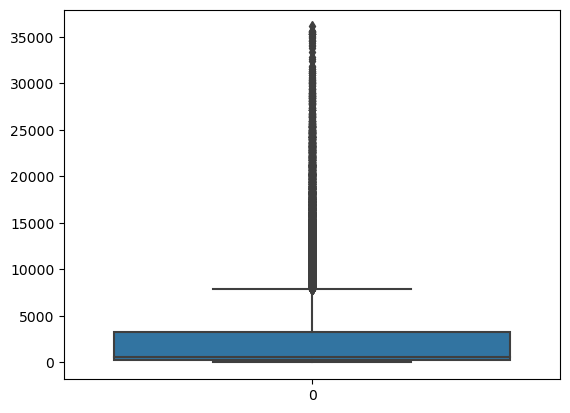

In [428]:
import seaborn as sns
sns.boxplot(df['last_pymnt_amnt'])

In [429]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [430]:
import pandas as pd

# Assuming df is your DataFrame and 'emp_length' is the column containing employment lengths

# Define a mapping dictionary
emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Apply the mapping to create a new numeric column
df['emp_length'] = df['emp_length'].map(emp_length_mapping)
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce')
# Display the result
print(df[['emp_length']])


       emp_length
0            10.0
1             0.0
2            10.0
3            10.0
4             1.0
...           ...
39712         4.0
39713         3.0
39714         0.0
39715         0.0
39716         0.0

[39717 rows x 1 columns]


In [431]:
df.issue_d = pd.to_datetime(df.issue_d , format='%b-%y')
# df['date_column'] = pd.to_datetime(df['date_column'], format='%d-%m-%y', errors='coerce')


In [432]:
df.issue_d = pd.to_datetime(df.issue_d , format='%b-%y')
df['issue_month'] = df.issue_d.dt.month
df['issue_year'] = df.issue_d.dt.year


In [433]:
df.issue_year.value_counts()

2011    21656
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_year, dtype: int64

In [434]:
df.drop(columns='url', inplace=True)

In [435]:
df.zip_code = df.zip_code.str.rstrip('xx')
df.zip_code = pd.to_numeric(df.zip_code)

In [436]:
df['delayed_payment_in_past'] = df.delinq_2yrs > 0

In [437]:
df.delayed_payment_in_past.value_counts()
df.drop(columns='delinq_2yrs', inplace=True)

In [438]:
df.drop(columns='issue_d', inplace=True)

In [439]:
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line , format='%b-%y')
df['last_loan_taken_month'] = df.earliest_cr_line.dt.month
df['last_loan_taken_year'] = df.earliest_cr_line.dt.year
df.drop(columns='earliest_cr_line', inplace=True)

In [440]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year,delayed_payment_in_past,last_loan_taken_month,last_loan_taken_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.00,Jan-15,171.62,May-16,0.0,12,2011,False,1,1985
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1.11,Apr-13,119.66,Sep-13,0.0,12,2011,False,4,1999
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.00,Jun-14,649.91,May-16,0.0,12,2011,False,11,2001
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.00,Jan-15,357.48,Apr-16,0.0,12,2011,False,2,1996
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.00,May-16,67.79,May-16,0.0,12,2011,False,1,1996


In [441]:
df.total_pymnt = df.total_pymnt.round(2)

In [442]:
df.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [443]:
df[df.out_prncp>0].loan_status.value_counts()

df.out_prncp.value_counts()

0.00       38577
1972.60        2
827.13         2
2277.11        2
2963.24        2
           ...  
782.23         1
2296.41        1
1928.85        1
1061.32        1
79.24          1
Name: out_prncp, Length: 1137, dtype: int64

In [444]:
df.drop(columns=['out_prncp'], inplace=True)

In [445]:
df.drop(columns=['total_pymnt_inv'], inplace=True)

In [446]:
df.drop(columns='collection_recovery_fee', inplace=True)

In [447]:
df['late_fee_received'] = df['total_rec_late_fee'].apply(lambda x: 'YES' if x > 0 else 'NO')
df.drop(columns='total_rec_late_fee', inplace=True)


In [448]:
df['recoveries_happen'] = df['recoveries'].apply(lambda x: 'YES' if x > 0 else 'NO')
df.drop(columns='recoveries', inplace=True)

In [449]:
df['bankrupt_in_past'] = df['pub_rec_bankruptcies'].apply(lambda x: 'YES' if x > 0 else 'NO')
df.drop(columns='pub_rec_bankruptcies', inplace=True)

In [450]:
df.shape

(39717, 42)

In [451]:
df.issue_year.value_counts()

2011    21656
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_year, dtype: int64

In [452]:
df.last_loan_taken_year.value_counts()

2000    3250
1999    2968
1998    2851
2001    2521
1997    2456
1996    2274
1995    2150
1994    2027
2002    1927
2003    1856
2004    1761
1993    1514
2005    1493
2006    1169
1992    1063
1990    1038
1991     980
1989     861
1988     740
2007     712
1987     618
1986     500
1985     461
1984     409
1983     338
1982     224
1981     187
1980     180
1979     165
1978     165
2008     159
1977     115
1976      97
1975      83
1973      66
1974      65
1972      53
1970      48
1971      46
1969      37
2068      20
2067      18
2066      11
2063      10
2064       9
2065       9
2062       5
2054       2
2061       2
2059       1
2056       1
2046       1
2050       1
Name: last_loan_taken_year, dtype: int64

In [453]:
#it seems some year conversion in last_loan_taken_year is wrong, we need to correct them. Lets write simple function which can help is

def correctYear(column):
    if (column > 2023):
        y = column - 2000
        return 1900+y
    return column

df.last_loan_taken_year = df.last_loan_taken_year.apply(lambda x: correctYear(x))


In [454]:
df.last_loan_taken_year.value_counts()

2000    3250
1999    2968
1998    2851
2001    2521
1997    2456
1996    2274
1995    2150
1994    2027
2002    1927
2003    1856
2004    1761
1993    1514
2005    1493
2006    1169
1992    1063
1990    1038
1991     980
1989     861
1988     740
2007     712
1987     618
1986     500
1985     461
1984     409
1983     338
1982     224
1981     187
1980     180
1979     165
1978     165
2008     159
1977     115
1976      97
1975      83
1973      66
1974      65
1972      53
1970      48
1971      46
1969      37
1968      20
1967      18
1966      11
1963      10
1964       9
1965       9
1962       5
1954       2
1961       2
1959       1
1956       1
1946       1
1950       1
Name: last_loan_taken_year, dtype: int64

In [455]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp_inv', 'total_pymnt', 'total_rec_prncp',
       'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'issue_month', 'issue_year',
       'delayed_payment_in_past', 'last_loan_taken_month',
       'last_loan_taken_year', 'late_fee_received', 'recoveries_happen',
       'bankrupt_in_past'],
      dtype='object')

In [456]:
df.drop(columns='funded_amnt_inv', inplace=True)

In [457]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp_inv', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'issue_month',
       'issue_year', 'delayed_payment_in_past', 'last_loan_taken_month',
       'last_loan_taken_year', 'late_fee_received', 'recoveries_happen',
       'bankrupt_in_past'],
      dtype='object')

In [458]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [459]:
df.pub_rec.value_counts()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [460]:
df.title.value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

In [461]:
gb = df.groupby(by = 'loan_status')
gb.describe()

id                                                     \
               count           mean            std       min        25%   
loan_status                                                               
Charged Off   5627.0  697844.014217  216376.676676   61419.0  529724.50   
Current       1140.0  911656.866667  104687.450073  682952.0  819501.25   
Fully Paid   32950.0  672712.992261  207806.743790   54734.0  508744.00   

                                            member_id                ...  \
                  50%        75%        max     count          mean  ...   
loan_status                                                          ...   
Charged Off  696937.0   854876.0  1077430.0    5627.0  8.677521e+05  ...   
Current      884842.5  1015549.0  1075358.0    1140.0  1.127244e+06  ...   
Fully Paid   651271.5   823113.5  1077501.0   32950.0  8.379351e+05  ...   

            last_loan_taken_month       last_loan_taken_year               \
                              75%   max                count         mean   
loan_status                                                                 
Charged Off                  10.0  12.0               5627.0  1996.947396   
Current                      10.0  12.0               1140.0  1995.078070   
Fully Paid                   10.0  12.0              32950.0  1996.546313   

                                                               
                  std     min     25%     50%     75%     max  
loan_status                                                    
Charged Off  6.757051  1962.0  1994.0  1998.0  2001.0  2008.0  
Current      7.049060  1964.0  1991.0  1996.0  2000.0  2008.0  
Fully Paid   6.824043  1946.0  1993.0  1998.0  2001.0  2008.0  

[3 rows x 200 columns]

In [462]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp_inv', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'issue_month',
       'issue_year', 'delayed_payment_in_past', 'last_loan_taken_month',
       'last_loan_taken_year', 'late_fee_received', 'recoveries_happen',
       'bankrupt_in_past'],
      dtype='object')

In [480]:
df = df[['id','member_id','funded_amnt','int_rate', 'term','grade','sub_grade','purpose','emp_length','home_ownership','annual_inc'
       ,'verification_status','dti','inq_last_6mths','pub_rec','revol_bal','revol_util','total_acc','issue_month','issue_year'
       ,'loan_status','delayed_payment_in_past','bankrupt_in_past']]

KeyError: "['emp_length'] not in index"

In [464]:
df.shape

(39717, 23)

In [165]:
df[df.loan_amnt > 22500].loan_amnt.describe()

count      703.000000
mean     25030.085349
std       2052.240609
min      22575.000000
25%      24000.000000
50%      25000.000000
75%      25000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [372]:
df.annual_inc.mean()

68968.92637711811

In [510]:
float_columns = df.select_dtypes(include=['int64','float64']).columns

print(float_columns)
# Define a function to identify outliers using the IQR method
def identify_outliers(column):
    mean = df[column].mean()
    sd = df[column].std()
    lower_bound = mean - 2 * sd
    upper_bound = mean + 2 * sd
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

# Identify outliers for all float columns
all_outliers = pd.DataFrame()
x = pd.DataFrame()
for column in float_columns:
    outliers = identify_outliers(column)
    all_outliers[column] = outliers
    

# Display or use the information about outliers
print(all_outliers.sum())


Index(['id', 'member_id', 'funded_amnt', 'int_rate', 'annual_inc', 'dti',
       'inq_last_6mths', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'issue_month', 'issue_year', 'emp_exp', 'loan_status_numeric'],
      dtype='object')
id                      600
member_id               953
funded_amnt            1399
int_rate               1123
annual_inc             1066
dti                     399
inq_last_6mths          586
pub_rec                2116
revol_bal              1669
revol_util                0
total_acc              1726
issue_month               0
issue_year             1812
emp_exp                   0
loan_status_numeric    5627
dtype: int64


<Axes: >

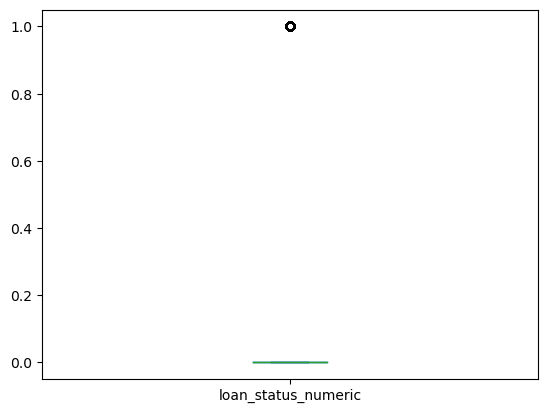

In [514]:
df.loan_status_numeric.plot(kind = 'box')

In [466]:
df =  df[df.annual_inc < 2000000]


In [468]:
df['emp_exp'] = df['emp_length']
df.drop(columns = 'emp_length', inplace=True)


In [469]:
df.purpose.value_counts()

debt_consolidation    18640
credit_card            5130
other                  3993
home_improvement       2974
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

<Axes: >

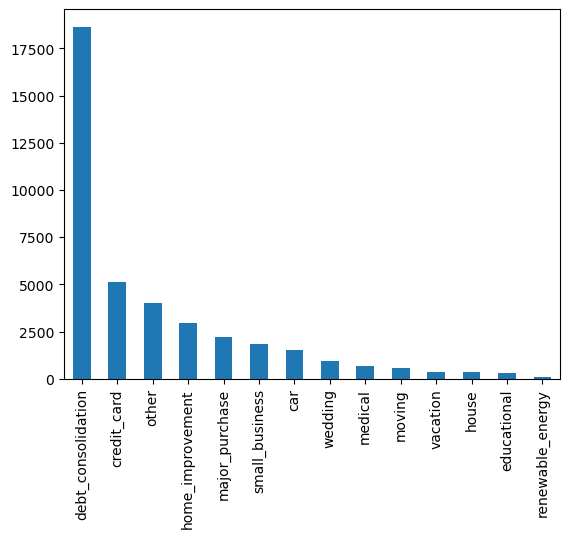

In [470]:
df.purpose.value_counts().plot(kind = 'bar')

In [429]:
df.columns

Index(['loan_amnt', 'int_rate', 'term', 'grade', 'sub_grade', 'purpose',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'dti', 'inq_last_6mths', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'loan_status', 'delayed_payment_in_past',
       'bankrupt_in_past'],
      dtype='object')

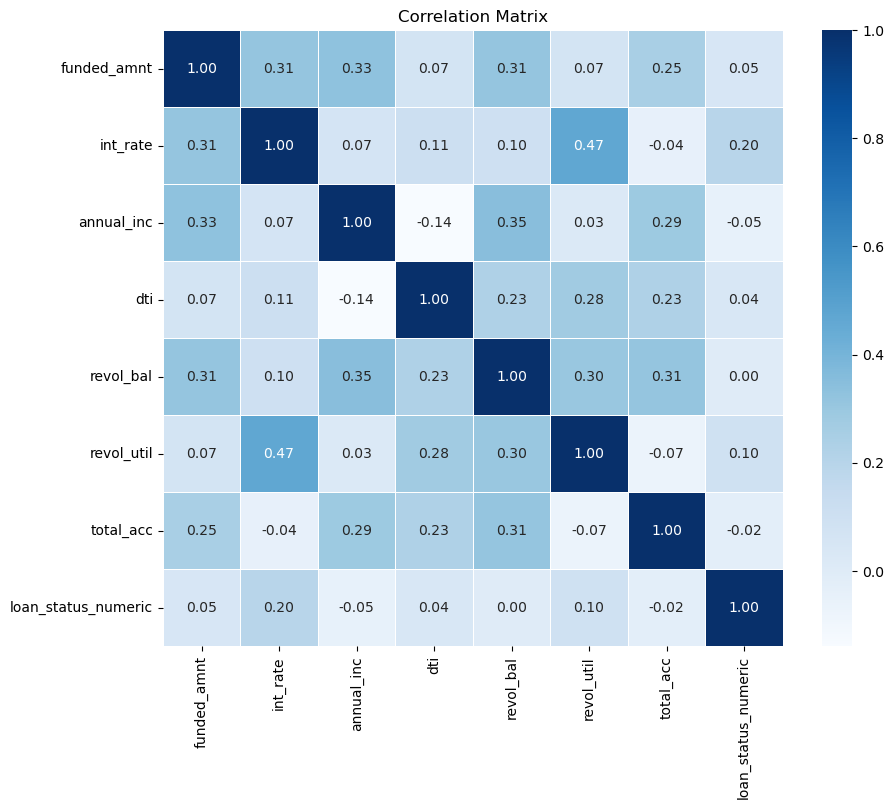

In [473]:
df['loan_status_numeric'] = (df['loan_status'] == 'Charged Off').astype(int)

corr = df[['funded_amnt','int_rate','annual_inc','dti','revol_bal','revol_util','total_acc','loan_status_numeric']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", linewidths=.5, color = 'blue')
plt.title('Correlation Matrix')
plt.show()







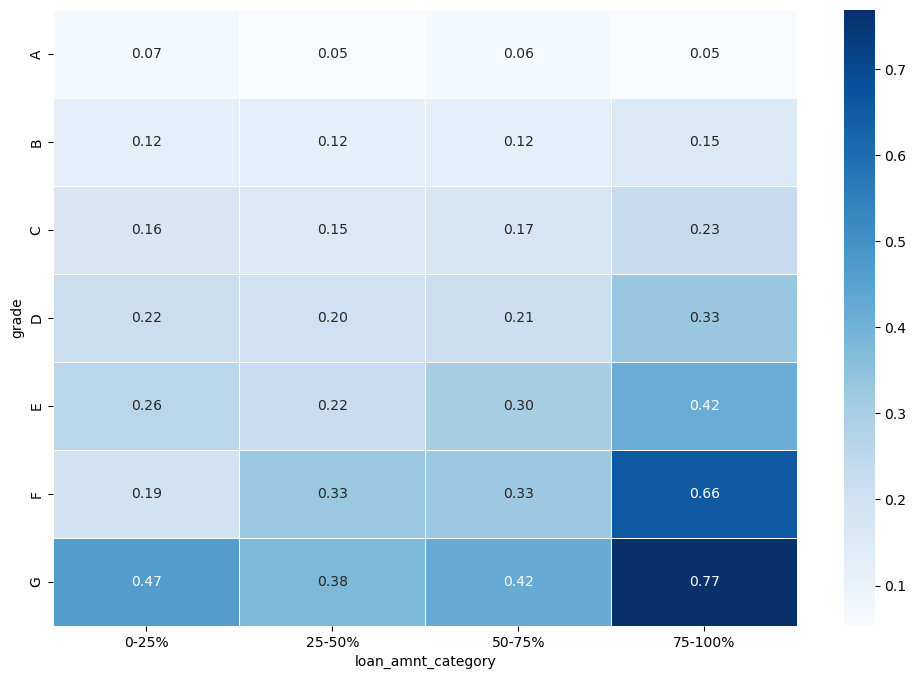

In [474]:
#making loan range buckets will be better here
percentiles = [0, .25, .50, .75, 1.00]

# Create categories based on loan amounts percentiles
df['funded_amnt_category'] = pd.qcut(df['funded_amnt'], q=percentiles, labels=False)

# Rename the categories for better interpretation
category_labels = ['0-25%', '25-50%', '50-75%', '75-100%']
df['funded_amnt_category'] = pd.cut(df['funded_amnt_category'], bins=len(percentiles)-1, labels=category_labels)


In [475]:
percentiles = [0, .25, .50, .75, 1.00]

# Create categories based on loan amounts percentiles
df['annual_income_category'] = pd.qcut(df['annual_inc'], q=percentiles, labels=False)

# Rename the categories for better interpretation
category_labels = ['0-25%', '25-50%', '50-75%', '75-100%']
df['annual_income_category'] = pd.cut(df['annual_income_category'], bins=len(percentiles)-1, labels=category_labels)

In [477]:
percentiles = [0, .25, .50, .75, 1.00]

# Create categories based on loan amounts percentiles
df['int_rate_category'] = pd.qcut(df['int_rate'], q=percentiles, labels=False)

# Rename the categories for better interpretation
category_labels = ['0-25%', '25-50%', '50-75%', '75-100%']
df['int_rate_category'] = pd.cut(df['int_rate_category'], bins=len(percentiles)-1, labels=category_labels)

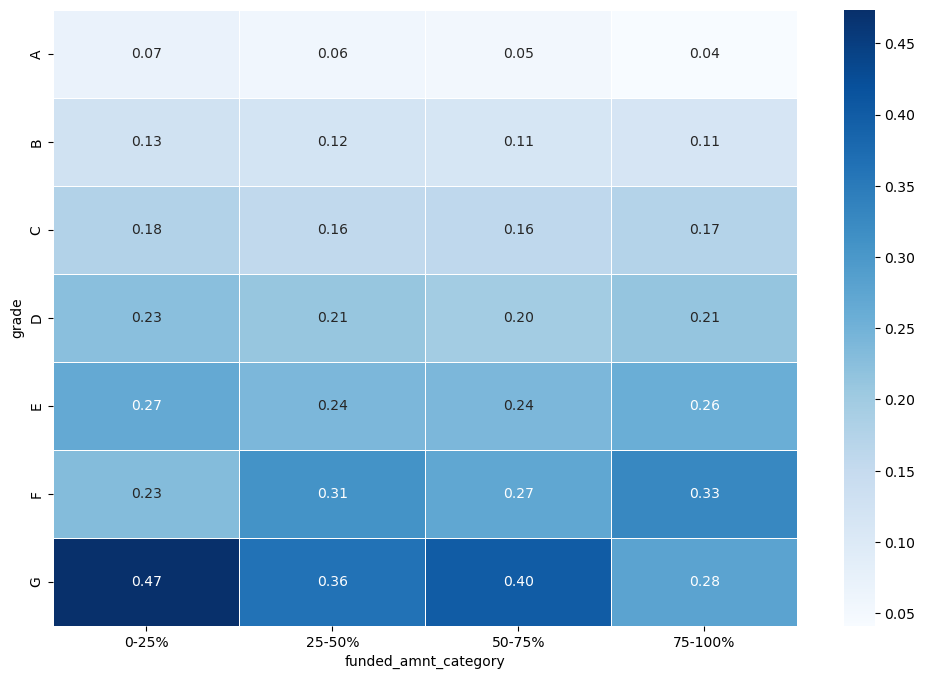

In [478]:
pivot_table = df.pivot_table(index='grade', columns=['funded_amnt_category'], values='loan_status_numeric', aggfunc='mean')

# Visualize the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.show()

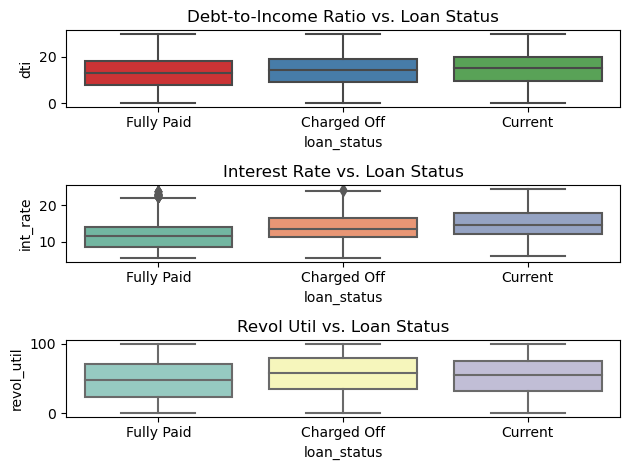

In [481]:

# plt.subplot(5, 1, 1)
# sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette='Set1')
# plt.title('Loan Amount vs. Loan Status')

# # Box plot for annual income vs. loan status
# plt.subplot(5, 1, 2)
# sns.boxplot(x='loan_status', y='annual_inc', data=df, palette='Set2')
# plt.title('Annual Income vs. Loan Status')

# Box plot for debt-to-income ratio vs. loan status
plt.subplot(3, 1, 1)
sns.boxplot(x='loan_status', y='dti', data=df, palette='Set1')
plt.title('Debt-to-Income Ratio vs. Loan Status')

plt.subplot(3, 1, 2)
sns.boxplot(x='loan_status', y='int_rate', data=df, palette='Set2')
plt.title('Interest Rate vs. Loan Status')


plt.subplot(3, 1, 3)
sns.boxplot(x='loan_status', y='revol_util', data=df, palette='Set3')
plt.title('Revol Util vs. Loan Status')


plt.tight_layout()
plt.show()








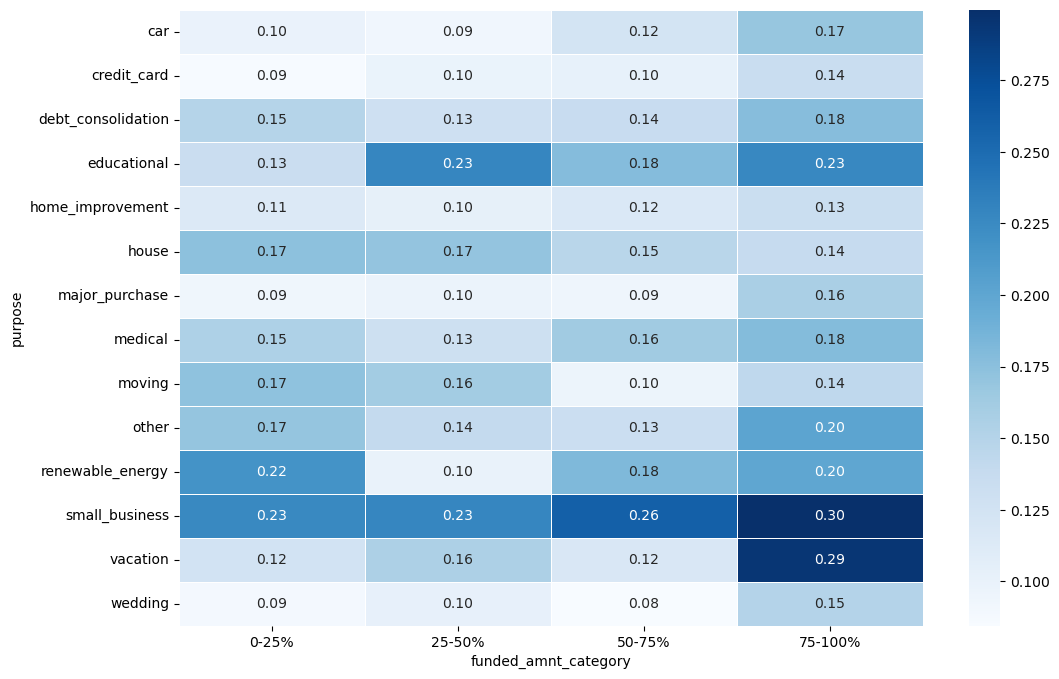

In [482]:
pivot_table = df.pivot_table(index='purpose', columns=['funded_amnt_category'], values='loan_status_numeric', aggfunc='mean')

# Visualize the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.show()

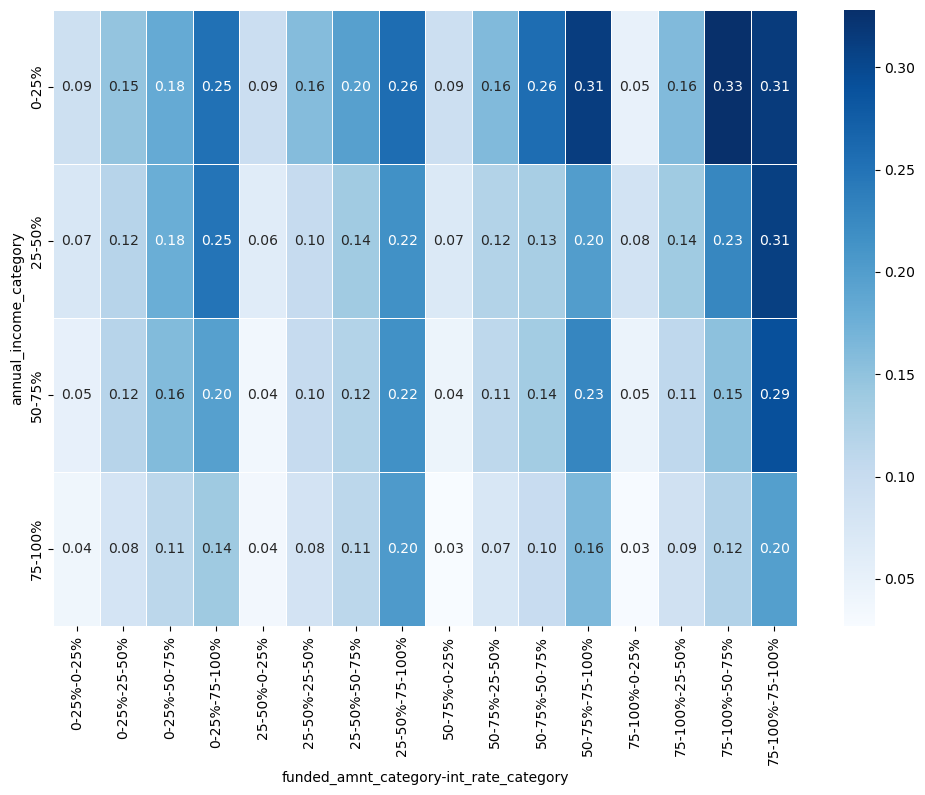

In [483]:
pivot_table = df.pivot_table(index='annual_income_category', columns=['funded_amnt_category','int_rate_category'], values='loan_status_numeric', aggfunc='mean')

# Visualize the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.show()







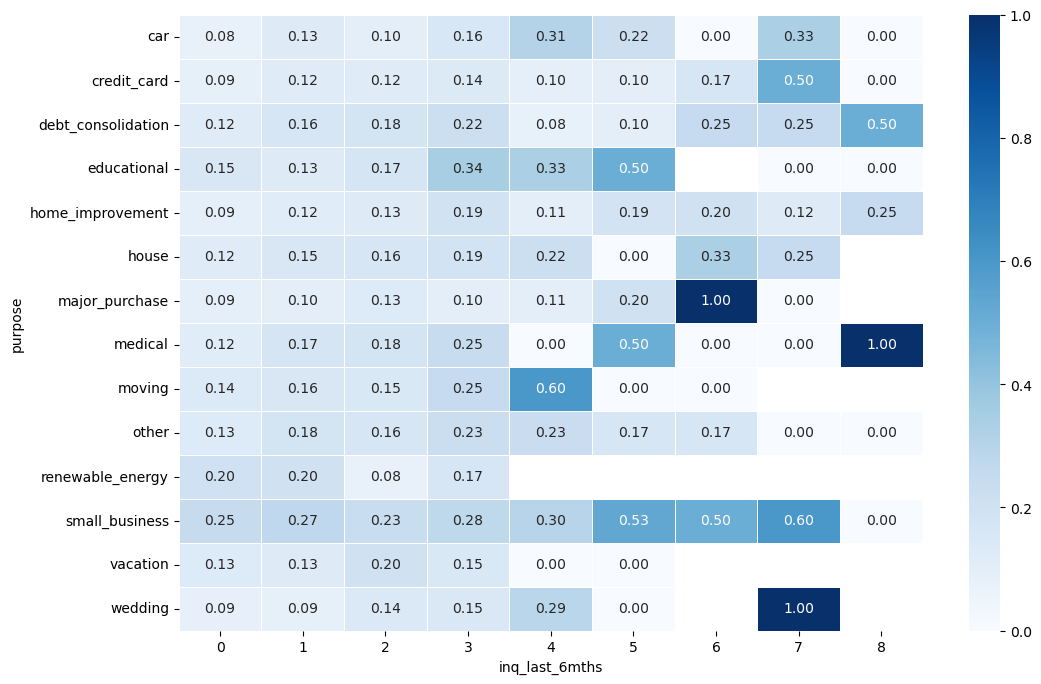

In [485]:
pivot_table = df.pivot_table(index='purpose', columns=['inq_last_6mths'], values='loan_status_numeric', aggfunc='mean')

# Visualize the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.show()

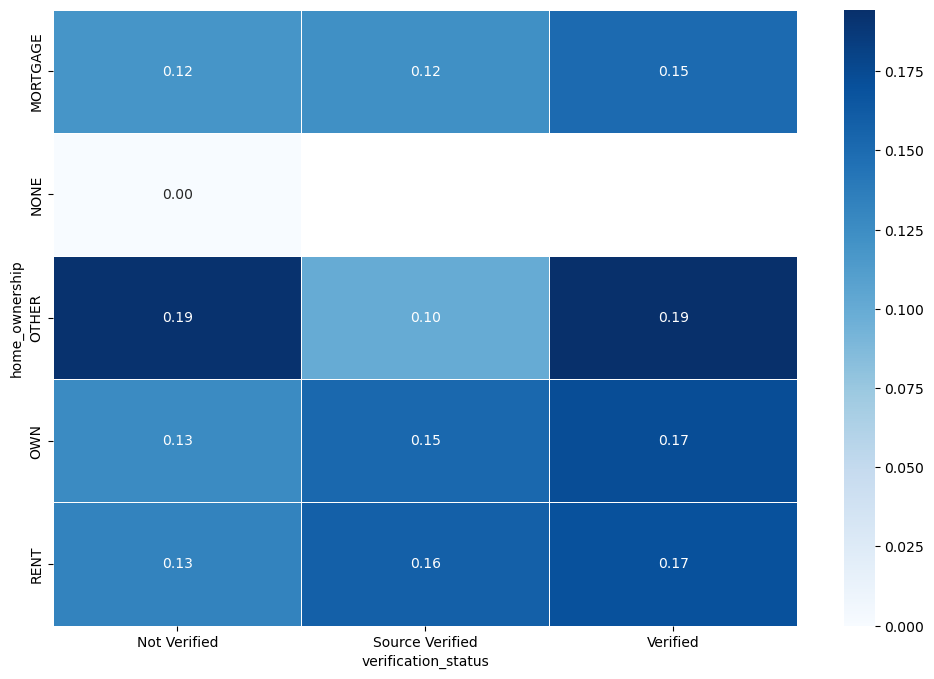

In [491]:
pivot_table = df.pivot_table(index='home_ownership', columns=['verification_status'], values='loan_status_numeric', aggfunc='mean')

# Visualize the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.show()

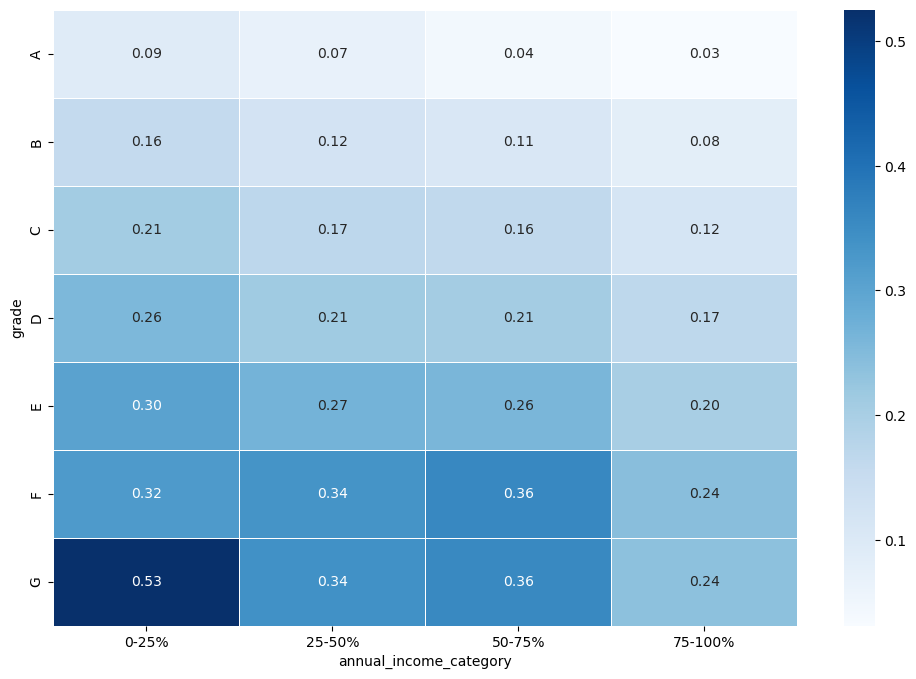

In [539]:
pivot_table = df.pivot_table(index='grade', columns=['annual_income_category'], values='loan_status_numeric', aggfunc='mean')

# Visualize the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.show()